# Situacion Problema

# Introduccion

# Descripcion de las Variables

# Importacion de librerias  

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [6]:
pip install seaborn

     |████████████████████████████████| 292 kB 19.3 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
url = "datasets/forestfires.csv"
df = pd.read_csv(url)
type(df)

pandas.core.frame.DataFrame

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Columns: 13 entries, X to area
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [13]:
df.index

RangeIndex(start=0, stop=517, step=1)

In [14]:
print(df.columns)

df.drop(['X', 'Y', 'RH', 'area'], axis=1, inplace=True)
print(df.columns)
df.head()

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'wind', 'rain'], dtype='object')


,month,day,FFMC,DMC,DC,ISI,temp,wind,rain
0,mar,fri,86.2,26.2,94.3,5.1,8.2,6.7,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,0.9,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,1.3,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,4.0,0.2
4,mar,sun,89.3,51.3,102.2,9.6,11.4,1.8,0.0


In [15]:
df.set_index('month')

,day,FFMC,DMC,DC,ISI,temp,wind,rain
month,,,,,,,,
mar,fri,86.2,26.2,94.3,5.1,8.2,6.7,0.0
oct,tue,90.6,35.4,669.1,6.7,18.0,0.9,0.0
oct,sat,90.6,43.7,686.9,6.7,14.6,1.3,0.0
mar,fri,91.7,33.3,77.5,9.0,8.3,4.0,0.2
mar,sun,89.3,51.3,102.2,9.6,11.4,1.8,0.0
...,...,...,...,...,...,...,...,...
aug,sun,81.6,56.7,665.6,1.9,27.8,2.7,0.0
aug,sun,81.6,56.7,665.6,1.9,21.9,5.8,0.0
aug,sun,81.6,56.7,665.6,1.9,21.2,6.7,0.0


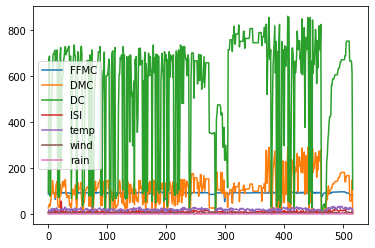

In [18]:
df.plot(kind = 'line')

# Pregunta de investigación #1: ¿Cuál es la temperatura más común en el evento de un incendio forestal?

Text(0, 0.5, 'Temperatura')

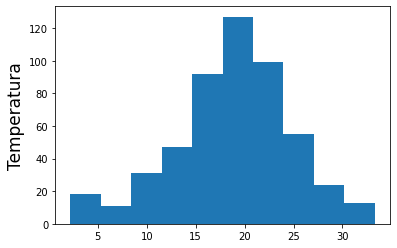

In [4]:
temp_hist = df['temp'].plot(kind = 'hist')
plt.ylabel('Temperatura', fontsize = 17)

# Pregunta de investigación #2: ¿Existe correlación entre las variables "ISI" y "temp"?

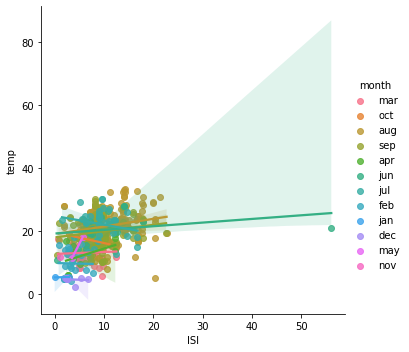

In [3]:
sns.lmplot(x = 'ISI',
           y = 'temp',
           hue = 'month',
           data = df
          )

In [14]:
my_pivot = pd.pivot_table(df,
                          index = 'month',
                          values = ['ISI','temp'],
                         )
my_pivot

,ISI,temp
month,,
apr,5.377778,12.044444
aug,11.072283,21.631522
dec,3.466667,4.522222
feb,3.350000,9.635000
jan,1.450000,5.250000
jul,9.393750,22.109375
jun,11.776471,20.494118
mar,7.107407,13.083333
may,4.600000,14.650000


# Pregunta de investigacion #3: ¿En que meses del año el valor de la variable "ISI" (potencial de incendio) es mayor?

In [23]:
df = pd.read_csv('datasets/forestfires.csv')
df.head(2)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


In [28]:
my_pivot = pd.pivot_table(df,
                          index = 'month',
                          values = 'ISI',
                          aggfunc = ['mean','sum'],
                         )
my_pivot

,mean,sum
,ISI,ISI
month,,
apr,5.377778,48.4
aug,11.072283,2037.3
dec,3.466667,31.2
feb,3.350000,67.0
jan,1.450000,2.9
jul,9.393750,300.6
jun,11.776471,200.2
mar,7.107407,383.8


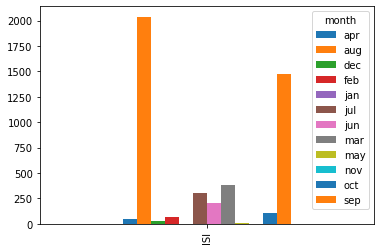

In [29]:
pivot_common=pd.pivot_table(df,
                            values='ISI',
                            columns='month',
                            aggfunc='sum'
                           ).plot(kind='bar')
pivot_common

# Pregunta de investigación #4: ¿Para que mes es mayor el porcentaje del indicador "DC"?

In [15]:
pivot_dc=pd.pivot_table(df,
                        values='DC',
                        columns='month',
                        aggfunc='sum'
                       )
pivot_dc

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
DC,437.0,117958.3,3161.2,1093.4,180.7,14419.3,5061.0,4100.9,187.5,106.7,10225.1,126353.9


Text(0.5, 1.0, 'Porcentaje de "DC" para cada mes del año')

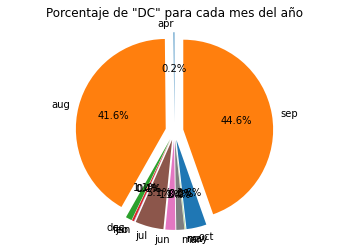

In [18]:
labels=['apr','aug','dec','feb','jan','jul','jun','mar','may','nov','oct','sep']
sizes=[437,117958.3,3161.2,1093.4,180.7,14419.3,5061.0,4100.9,187.5,106.7,10225.1,126353.9]
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
fig,ax=plt.subplots()
ax.pie(sizes,
       explode=explode,
       labels=labels,
autopct='%1.1f%%',
shadow=False,
startangle=90)
ax.axis('equal')
ax.set_title('Porcentaje de "DC" para cada mes del año')

# Pregunta de investigación #5: ¿Cuál es el comportamiento de la variable "FFMC" con respecto a los meses del año?

Text(0, 0.5, 'FFMC')

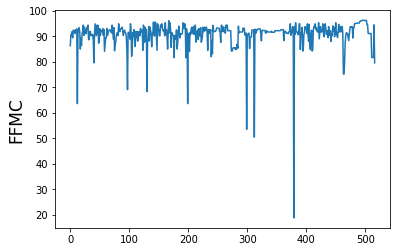

In [9]:
ffmc_graf = df['FFMC'].plot(kind = 'line')
plt.ylabel('FFMC', fontsize = 17)

<function seaborn.categorical.stripplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=True, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)>

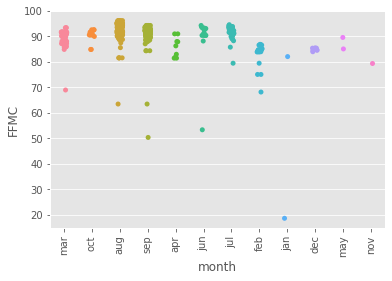

In [7]:
sns.stripplot(x='month',
              y='FFMC',
              data=df
             )
plt.xticks(rotation=90)
sns.stripplot

# Pregunta de investigación #6: ¿Cual es el comportamiento de los indicadores de incendios forestales con respecto a los meses del año?

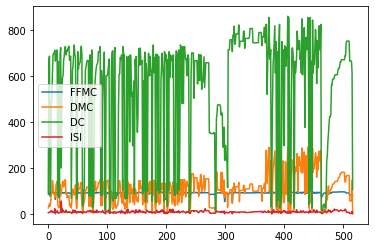

In [4]:
df[['FFMC','DMC','DC','ISI']].plot(kind='line')
mpl.style.use('ggplot')

<function seaborn.categorical.stripplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=True, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)>

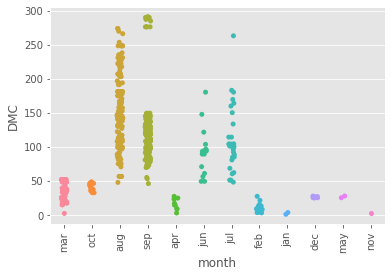

In [8]:
sns.stripplot(x='month',
              y='DMC',
              data=df
             )
plt.xticks(rotation=90)
sns.stripplot

<function seaborn.categorical.stripplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=True, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)>

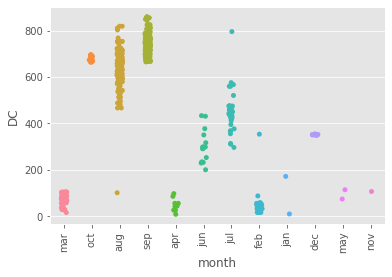

In [9]:
sns.stripplot(x='month',
              y='DC',
              data=df
             )
plt.xticks(rotation=90)
sns.stripplot

<function seaborn.categorical.stripplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=True, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)>

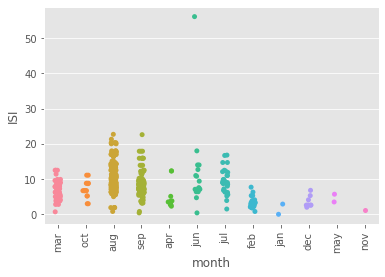

In [10]:
sns.stripplot(x='month',
              y='ISI',
              data=df
             )
plt.xticks(rotation=90)
sns.stripplot

# Pregunta de investigación #7: ¿